In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df["Exited_bool"] = df["Exited"].astype(bool)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_bool
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False


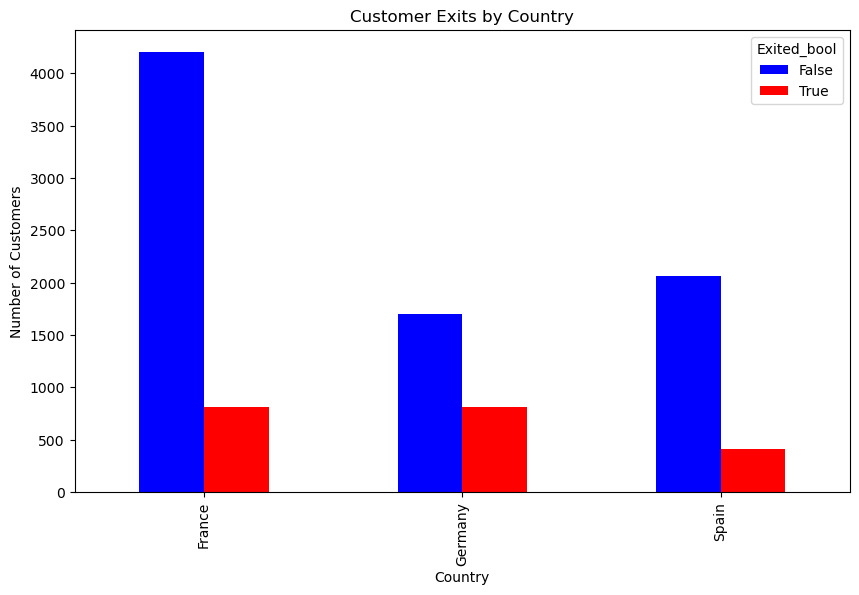

In [7]:
exited_count = df.groupby(["Geography", "Exited_bool"]).size().unstack(fill_value=0)

exited_count.plot(kind="bar", stacked=False, color=["blue", "red"], figsize=(10, 6))

plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Customer Exits by Country")
plt.show()

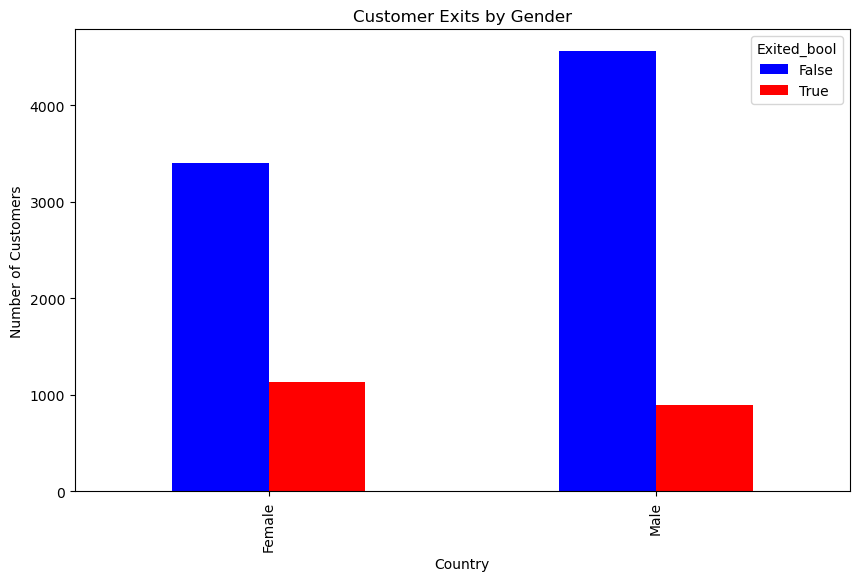

In [8]:
exited_count = df.groupby(["Gender", "Exited_bool"]).size().unstack(fill_value=0)

exited_count.plot(kind="bar", stacked=False, color=["blue", "red"], figsize=(10, 6))

plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Customer Exits by Gender")
plt.show()

In [9]:
exited = df[df['Exited_bool'] == True]
retained = df[df['Exited_bool'] == False]

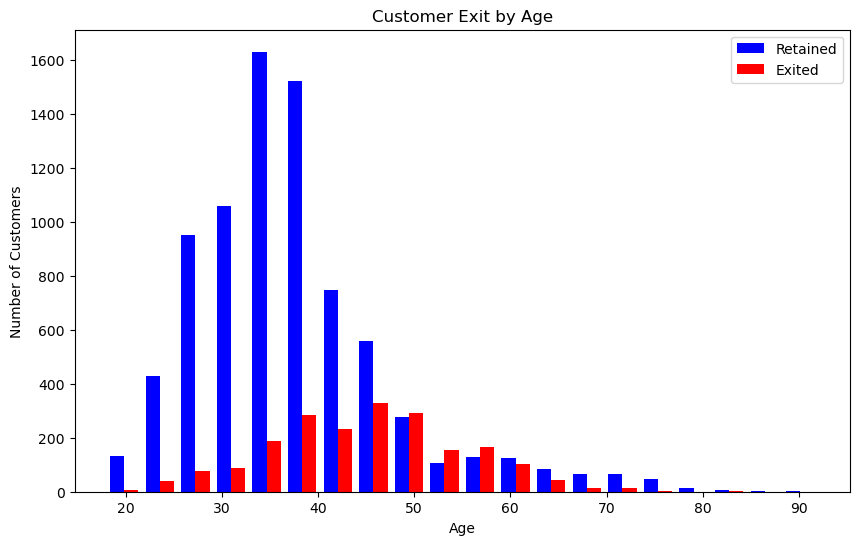

In [10]:
plt.figure(figsize=(10, 6))
plt.hist([retained['Age'], exited['Age']], bins=20, color=['blue', 'red'], label=['Retained', 'Exited'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Exit by Age')
plt.legend()
plt.show()

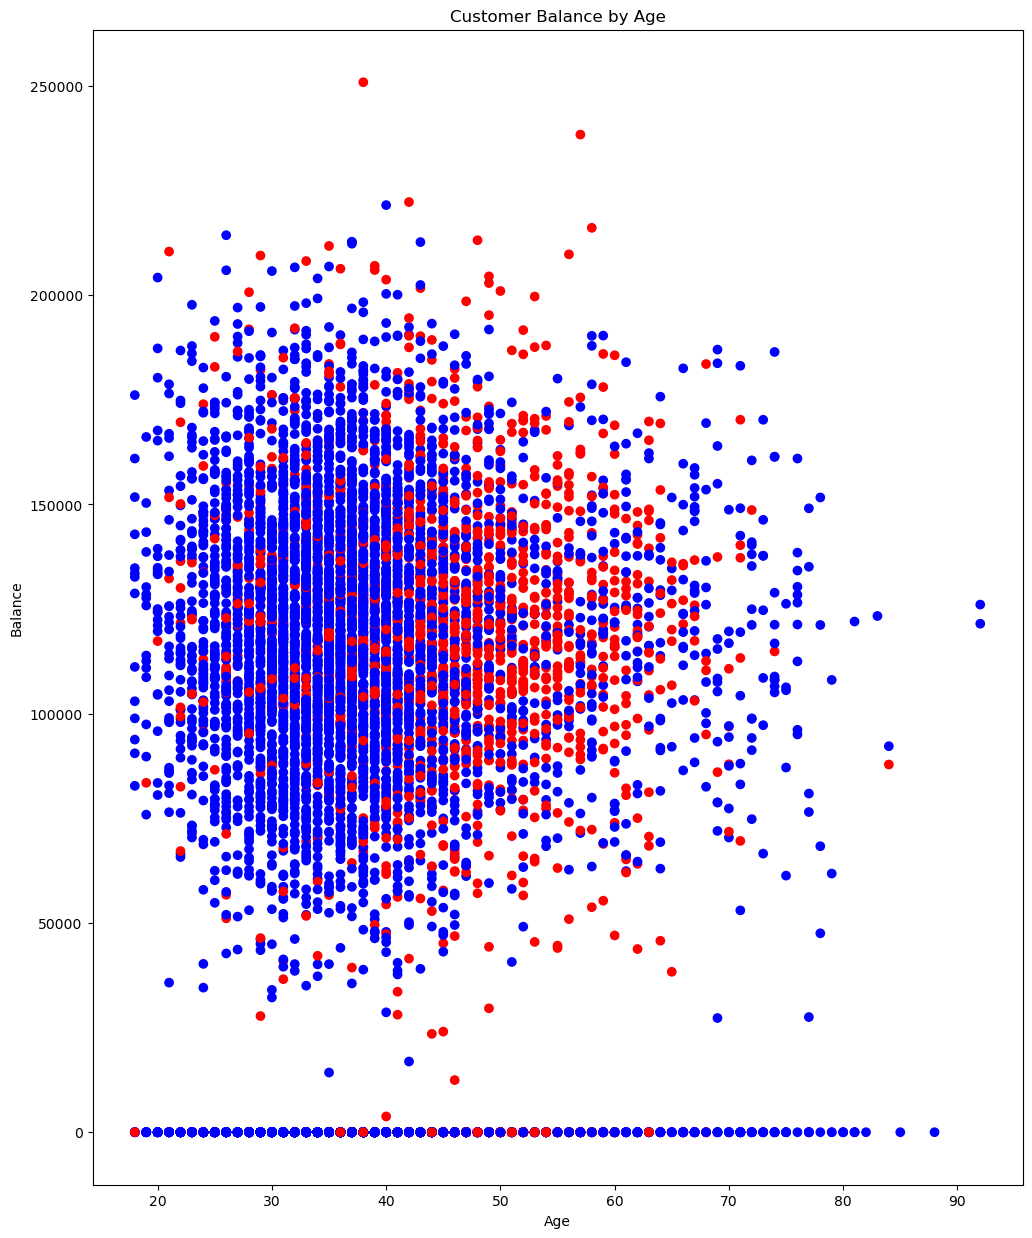

In [11]:
colors = df['Exited_bool'].map({True: 'red', False: 'blue'})

plt.figure(figsize=(12, 15))
plt.scatter(df['Age'], df['Balance'], c=colors)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Customer Balance by Age')
plt.show()

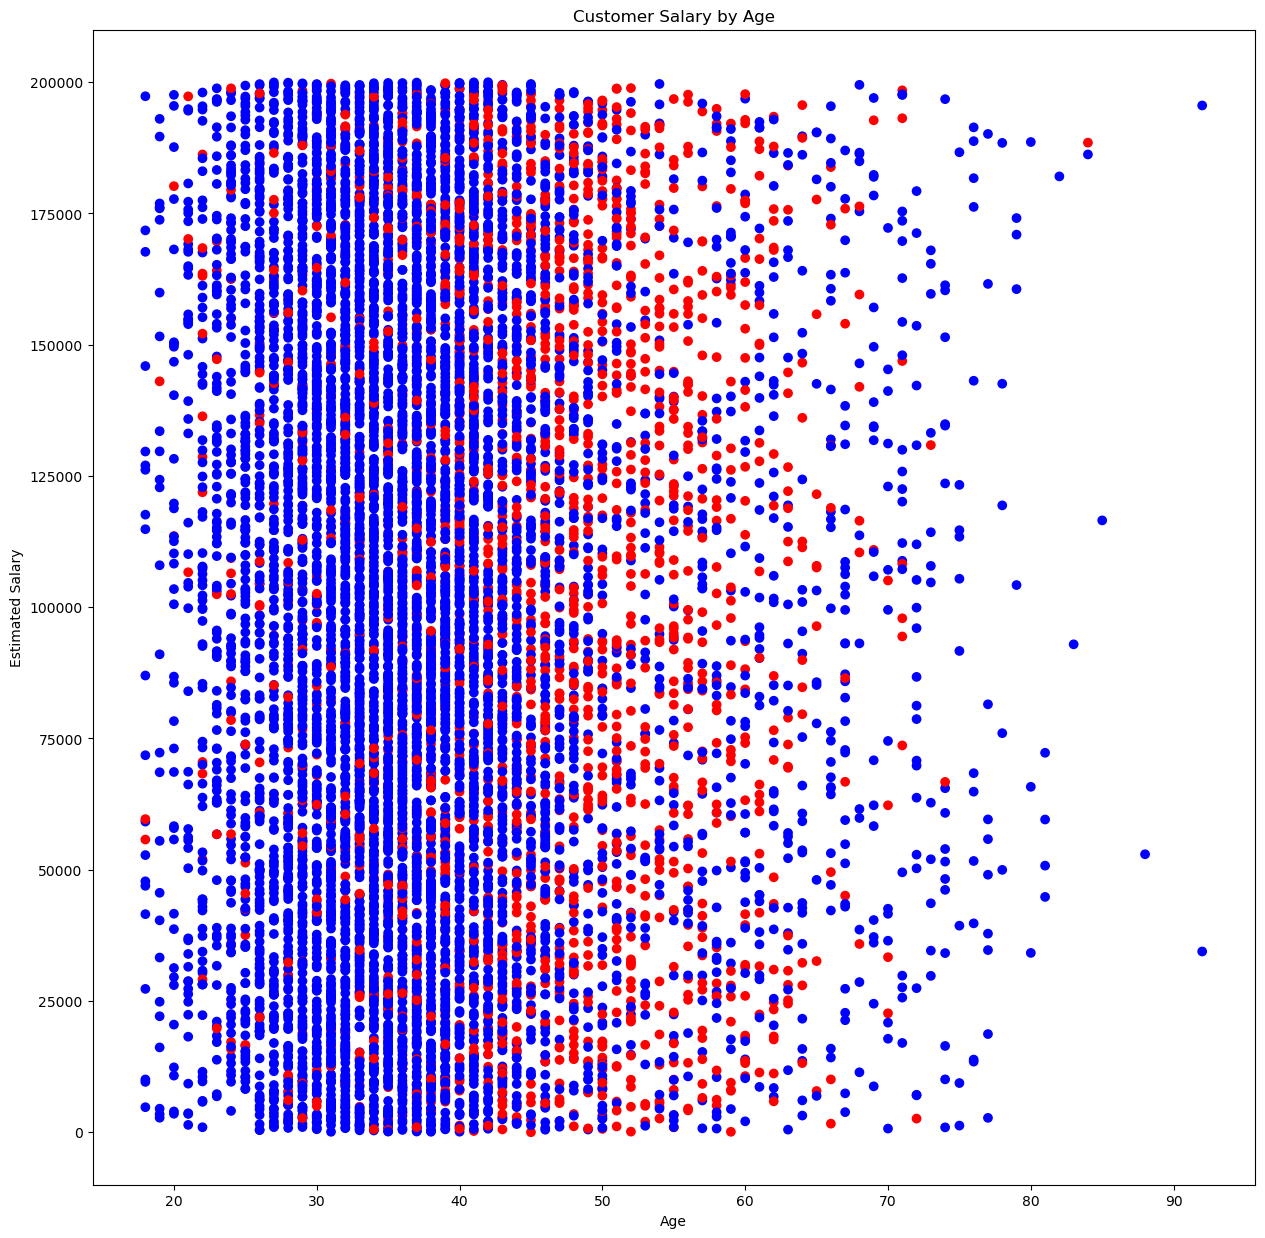

In [12]:
colors = df['Exited_bool'].map({True: 'red', False: 'blue'})

plt.figure(figsize=(15, 15))
plt.scatter(df['Age'], df['EstimatedSalary'], c=colors)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Customer Salary by Age')
plt.show()

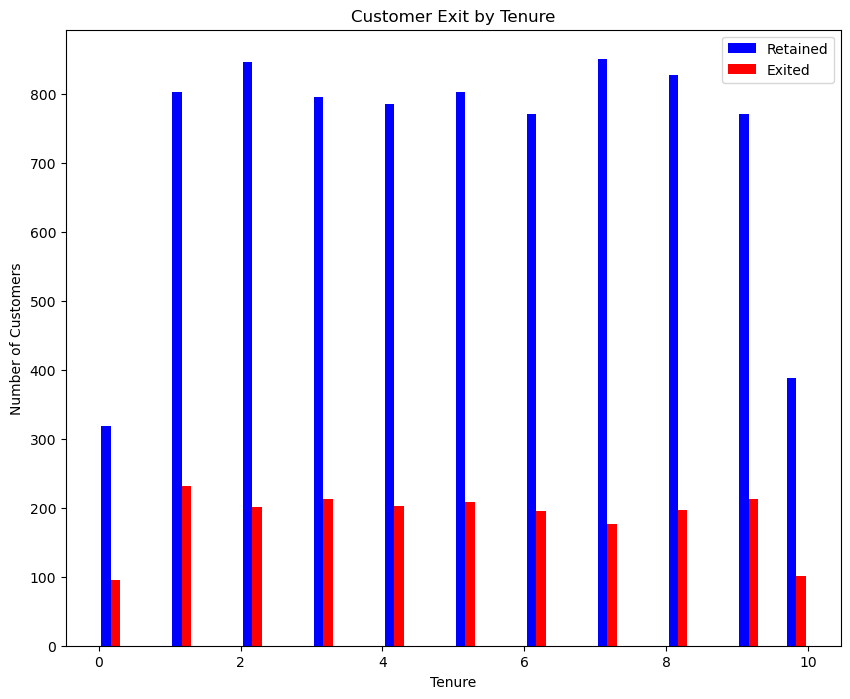

In [13]:
plt.figure(figsize=(10, 8))
plt.hist([retained['Tenure'], exited['Tenure']], bins=30, color=['blue', 'red'], label=['Retained', 'Exited'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Exit by Tenure')
plt.legend()
plt.show()

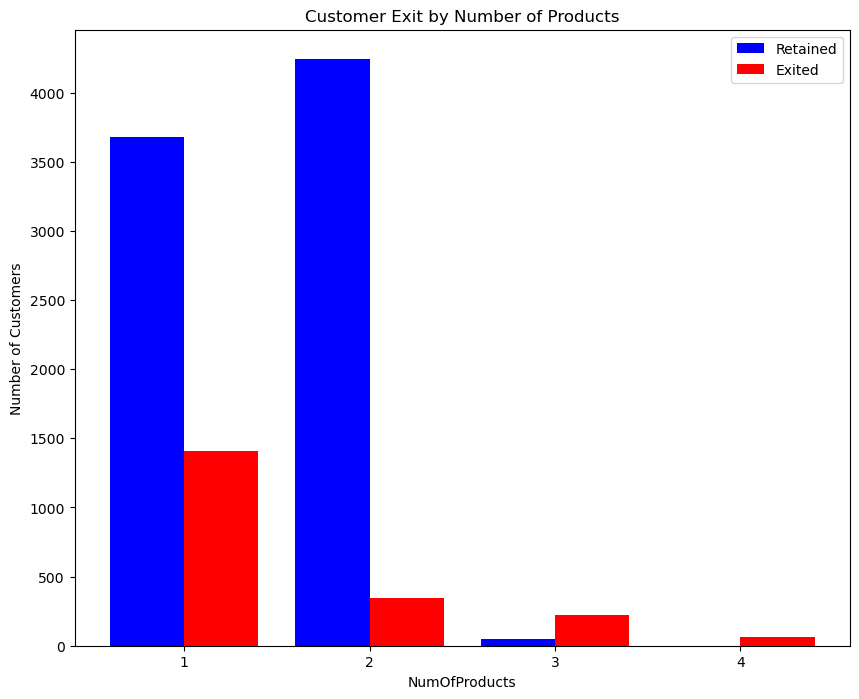

In [14]:
plt.figure(figsize=(10, 8))
plt.hist([retained['NumOfProducts'], exited['NumOfProducts']], bins=[1,2,3,4,5], align="mid", color=['blue', 'red'], label=['Retained', 'Exited'])
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers')
plt.xticks([1.5,2.5,3.5,4.5], [1,2,3,4])
plt.title('Customer Exit by Number of Products')
plt.legend()
plt.show()

In [15]:
crcard_exit = df[(df['HasCrCard'] == 1) & (df['Exited'] == 1)]
crcard_noexit = df[(df['HasCrCard'] == 1) & (df['Exited'] == 0)]

print("People exiting and having creditcard: ",len(crcard_exit))
print("People exiting and not having creditcard: ",len(crcard_noexit))

People exiting and having creditcard:  1424
People exiting and not having creditcard:  5631


In [16]:
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_bool
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,True
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,False
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,True
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,False
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,False


In [17]:
df.drop(columns=["Exited_bool"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,539,2,0,37,1,130922.81,2,0,0,2186.83,0
1,501,0,0,34,5,0.00,1,1,0,27380.99,0
2,745,1,0,28,1,111071.36,1,1,0,73275.96,1
3,785,0,0,38,1,0.00,1,1,0,134964.85,1
4,623,0,0,44,6,0.00,2,0,0,167162.43,0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.2)

print(x_train.head())
print(y_train.head())
print(len(x_train))
print(len(x_test))

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1480          647          1       0   22       3   97975.82              2   
210           690          2       0   48       2       0.00              2   
339           722          0       0   47       2   88011.40              1   
1225          646          0       0   51       4  101629.30              1   
1790          633          2       0   46       3       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
1480          0               1         62083.00  
210           1               1          3149.10  
339           1               1         90655.94  
1225          0               0        130541.10  
1790          1               0        120250.58  
1480    0
210     0
339     1
1225    0
1790    0
Name: Exited, dtype: int64
8000
2000


# Logistic Regression

In [21]:
%%time

log_model=LogisticRegression()
log_model.fit(x_train, y_train)

CPU times: total: 219 ms
Wall time: 166 ms


LogisticRegression()

In [22]:
%%time

y_pred_log = log_model.predict(x_test)
len(y_pred_log)

CPU times: total: 0 ns
Wall time: 6.21 ms


2000

In [23]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.795

In [24]:
confusion_matrix(y_test, y_pred_log)

array([[1561,   42],
       [ 368,   29]], dtype=int64)

# Random Forest

In [25]:
%%time

rf_model=RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_model.fit(x_train, y_train)

CPU times: total: 2.98 s
Wall time: 3.16 s


RandomForestClassifier(criterion='entropy')

In [26]:
%%time

y_pred_rf = rf_model.predict(x_test)
len(y_pred_rf)

CPU times: total: 93.8 ms
Wall time: 85.6 ms


2000

In [27]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8675

In [28]:
confusion_matrix(y_test, y_pred_rf)

array([[1548,   55],
       [ 210,  187]], dtype=int64)